In [1]:
import pandas as pd
import numpy as np
import obspy
import json
import os
import matplotlib.pyplot as plt
import matplotlib.dates as dates

os.chdir('/home/javak/phasenet_chile-subduction-zone')
PROJECT_ROOT = os.getcwd()

In [2]:
# Load events catalog
os.chdir('/home/javak/Sample_data_chile')
CATALOG_ROOT = os.getcwd()
catalog_txt = pd.read_csv(os.path.join(CATALOG_ROOT, "Events_catalog/IPOC_2007_2020_picks.txt"), sep="\t")
export_fig_path ='/home/javak/Sample_data_chile/Comparing PhaseNet and real data/CX.PB19.D.2020.366'

In [15]:

streamZ = obspy.read(os.path.join(CATALOG_ROOT, "mseed/CARS/CX.CAR3.00.HHE.D.2012.001"), sep="\t")
streamN = obspy.read(os.path.join(CATALOG_ROOT, "mseed/CARS/CX.PB01..HHN.D.2012.001"), sep="\t")
streamE = obspy.read(os.path.join(CATALOG_ROOT, "mseed/CARS/CX.PB01..HHE.D.2020.366"), sep="\t")
streamN += streamE
streamN += streamZ
stream = streamN.sort()
stream.write(os.path.join(CATALOG_ROOT, "mseed/CARS/CX.PB01..NEZ.HH.D.2020.366"), sep="\t", format="MSEED")



In [1636]:
picks_csv = pd.read_csv(os.path.join(PROJECT_ROOT, "results/picks.csv"), sep="\t")
picks_csv.loc[:, 'p_idx'] = picks_csv["p_idx"].apply(lambda x: x.strip("[]").split(","))
picks_csv.loc[:, 'p_prob'] = picks_csv["p_prob"].apply(lambda x: x.strip("[]").split(","))
picks_csv.loc[:, 's_idx'] = picks_csv["s_idx"].apply(lambda x: x.strip("[]").split(","))
picks_csv.loc[:, 's_prob'] = picks_csv["s_prob"].apply(lambda x: x.strip("[]").split(","))
print(picks_csv.iloc[0])
print(picks_csv)

fname                            CX.PB01..NEZ.HH.D.2020.366
t0                                  2020-12-30T23:59:53.528
p_idx     [55244, 68003, 74207, 120080, 135219, 184728, ...
p_prob    [0.385, 0.305, 0.465, 0.946, 0.563, 0.888, 0.6...
s_idx     [591, 39182, 55572, 81271, 121928, 137380, 156...
s_prob    [0.555, 0.404, 0.568, 0.388, 0.697, 0.381, 0.6...
Name: 0, dtype: object
                        fname                       t0  \
0  CX.PB01..NEZ.HH.D.2020.366  2020-12-30T23:59:53.528   

                                               p_idx  \
0  [55244, 68003, 74207, 120080, 135219, 184728, ...   

                                              p_prob  \
0  [0.385, 0.305, 0.465, 0.946, 0.563, 0.888, 0.6...   

                                               s_idx  \
0  [591, 39182, 55572, 81271, 121928, 137380, 156...   

                                              s_prob  
0  [0.555, 0.404, 0.568, 0.388, 0.697, 0.381, 0.6...  


In [1637]:
with open(os.path.join(PROJECT_ROOT, "results/picks.json")) as fp:
    picks_json = json.load(fp)  
#print(picks_json[0])

In [1638]:
# convert jason to data frame
df = pd.DataFrame.from_dict(pd.json_normalize(picks_json), orient='columns')
df_p_waves = df[df["type"] == 'p']
#df_p_waves = df_p_waves.sort_values('timestamp')
df_s_waves = df[df["type"] == 's']

In [1639]:
df_p_waves


,id,timestamp,prob,type
0,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T00:09:05.968,0.385177,p
1,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T00:11:13.558,0.305145,p
2,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T00:12:15.598,0.464926,p
3,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T00:19:54.328,0.946265,p
4,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T00:22:25.718,0.563404,p
...,...,...,...,...
273,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T23:22:33.418,0.336791,p
274,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T23:44:28.718,0.646373,p
275,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T23:46:23.478,0.383596,p
276,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T23:47:07.008,0.847553,p


In [1640]:
df_s_waves.iloc[0:10]

,id,timestamp,prob,type
278,CX.PB01..NEZ.HH.D.2020.366,2020-12-30T23:59:59.438,0.554925,s
279,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T00:06:25.348,0.404114,s
280,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T00:09:09.248,0.567611,s
281,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T00:13:26.238,0.388112,s
282,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T00:20:12.808,0.697182,s
283,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T00:22:47.328,0.381351,s
284,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T00:25:57.078,0.640178,s
285,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T00:30:55.228,0.635693,s
286,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T00:34:18.138,0.710155,s
287,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T00:35:14.928,0.652215,s


# Read data using obspy

In [1641]:
import obspy
stream = obspy.read(os.path.join(CATALOG_ROOT, "mseed/CX.PB01..NEZ.HH.D.2020.366"), sep="\t")
start=obspy.UTCDateTime("2020-12-31T09:55:35.598393Z")
dt = 1000
stream = stream.slice (start,start+dt)
stream.filter('bandpass', freqmin= 1, freqmax=20)
#stream.plot()
stream[0].stats

         network: CX
         station: PB01
        location: 
         channel: HHE
       starttime: 2020-12-31T09:55:35.598393Z
         endtime: 2020-12-31T10:12:15.598393Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 100001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 13428, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 20700160})
      processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2020, 12, 31, 10, 12, 15, 598393)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2020, 12, 31, 9, 55, 35, 598393))', "ObsPy 1.2.2: filter(options={'freqmin': 1, 'freqmax': 20}::type='bandpass')"]

In [1642]:
mask_p = (df_p_waves['timestamp']> stream[0].stats.starttime) & (df_p_waves['timestamp']<stream[0].stats.starttime+dt)
mask_s = (df_s_waves['timestamp']> stream[0].stats.starttime) & (df_s_waves['timestamp']<stream[0].stats.starttime+dt)

new_df_p_waves = df_p_waves.loc[mask_p]
new_df_s_waves = df_s_waves.loc[mask_s]
print (new_df_p_waves)
print (new_df_s_waves)

                             id                timestamp      prob type
112  CX.PB01..NEZ.HH.D.2020.366  2020-12-31T10:00:33.328  0.528583    p
113  CX.PB01..NEZ.HH.D.2020.366  2020-12-31T10:07:54.718  0.888681    p
114  CX.PB01..NEZ.HH.D.2020.366  2020-12-31T10:12:03.608  0.799890    p
                             id                timestamp      prob type
408  CX.PB01..NEZ.HH.D.2020.366  2020-12-31T09:58:40.648  0.667268    s
409  CX.PB01..NEZ.HH.D.2020.366  2020-12-31T09:59:34.858  0.468925    s
410  CX.PB01..NEZ.HH.D.2020.366  2020-12-31T10:00:45.128  0.714732    s
411  CX.PB01..NEZ.HH.D.2020.366  2020-12-31T10:08:12.488  0.659481    s


In [1643]:
stream[0].max()

2304.0548924813647

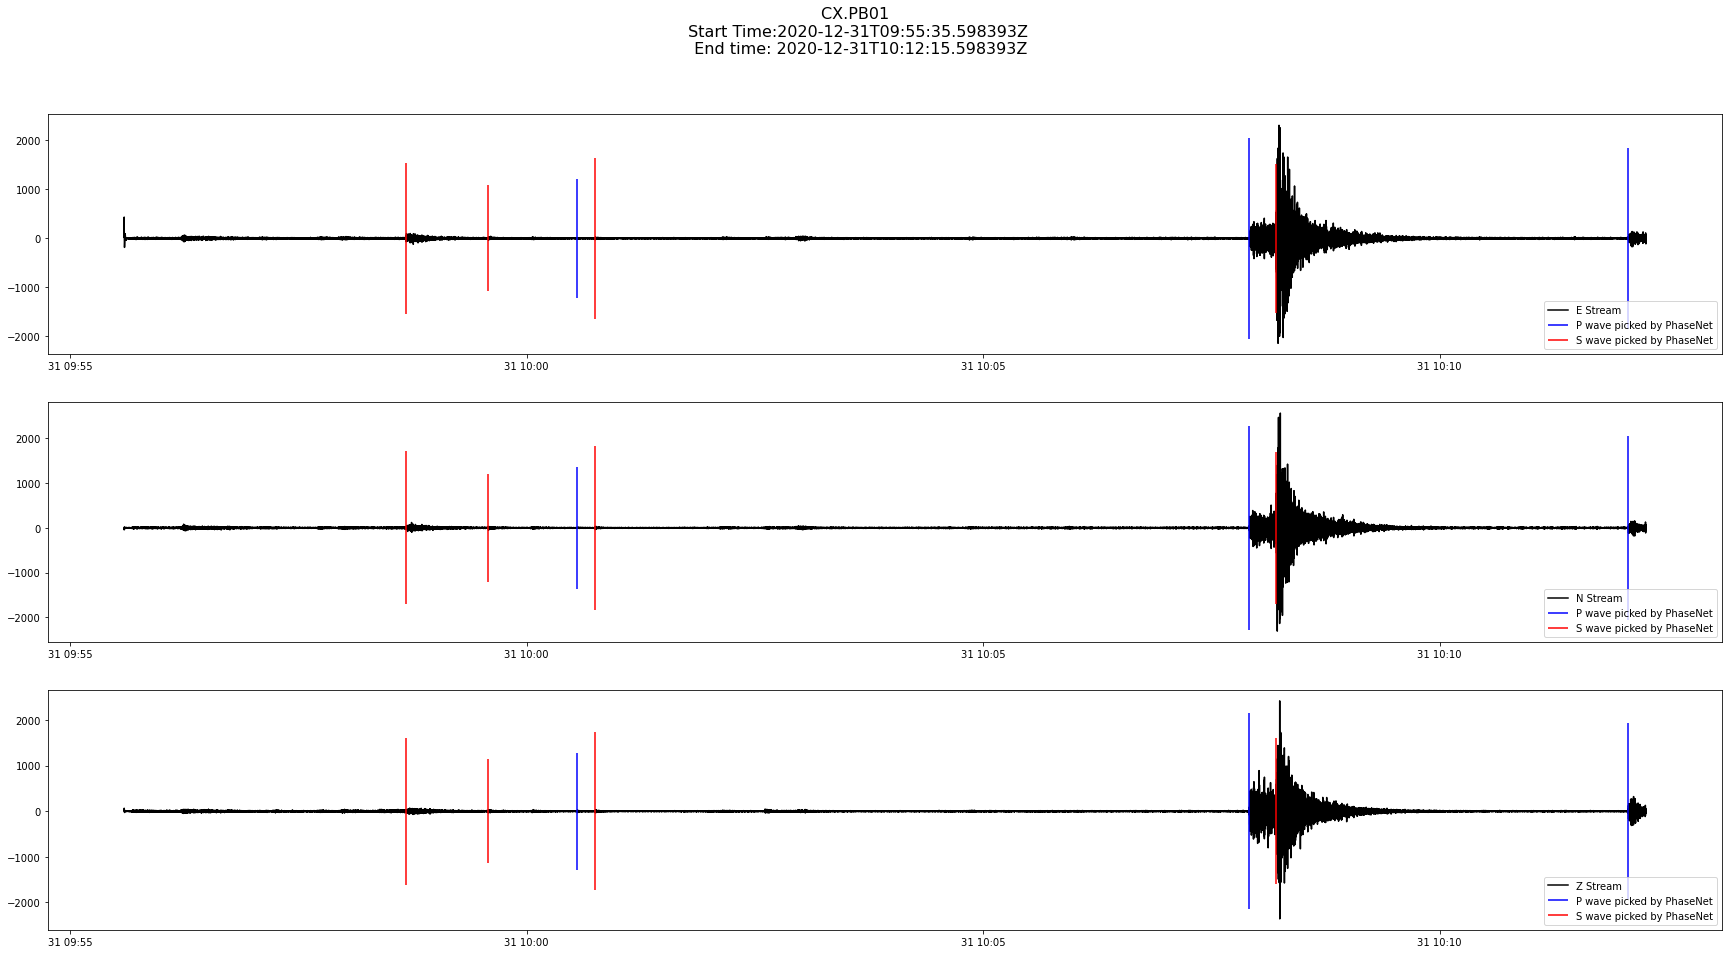

In [1644]:
import datetime
# plot
fig, ax = plt.subplots(3,1,figsize=(30,15))
times = stream[0].times('matplotlib')
ax[0].plot(stream[0].times('matplotlib'), stream[0].data, markersize=1, label = 'E Stream', color = 'k')
ax[1].plot(stream[1].times('matplotlib'), stream[1].data, markersize=1, label = 'N Stream', color = 'k')
ax[2].plot(stream[2].times('matplotlib'), stream[2].data, markersize=1, label = 'Z Stream', color = 'k')

# Draw P waves imported from PhaseNet
ax[0].vlines([obspy.UTCDateTime(t).matplotlib_date for t in new_df_p_waves['timestamp']], 
    ymin = (-stream[0].max()*np.array (new_df_p_waves['prob'])).tolist(),
    ymax = (stream[0].max()*np.array (new_df_p_waves['prob'])).tolist(),
    color='b', linestyle='solid', label = 'P wave picked by PhaseNet')
ax[0].xaxis_date()

ax[1].vlines([obspy.UTCDateTime(t).matplotlib_date for t in new_df_p_waves['timestamp']], 
    ymin = (-stream[1].max()*np.array (new_df_p_waves['prob'])).tolist(),
    ymax = (stream[1].max()*np.array (new_df_p_waves['prob'])).tolist(),
    color='b', linestyle='solid', label = 'P wave picked by PhaseNet')
ax[1].xaxis_date()

ax[2].vlines([obspy.UTCDateTime(t).matplotlib_date for t in new_df_p_waves['timestamp']], 
    ymin = (-stream[2].max()*np.array (new_df_p_waves['prob'])).tolist(),
    ymax = (stream[2].max()*np.array (new_df_p_waves['prob'])).tolist(),
    color='b', linestyle='solid', label = 'P wave picked by PhaseNet')
ax[2].xaxis_date()

# Draw S waves imported from PhaseNet
ax[0].vlines([obspy.UTCDateTime(t).matplotlib_date for t in new_df_s_waves['timestamp']], 
    ymin = (-stream[0].max()*np.array (new_df_s_waves['prob'])).tolist(),
    ymax = (stream[0].max()*np.array (new_df_s_waves['prob'])).tolist(),
    color='r', linestyle='solid', label = 'S wave picked by PhaseNet')
ax[0].xaxis_date()

ax[1].vlines([obspy.UTCDateTime(t).matplotlib_date for t in new_df_s_waves['timestamp']], 
    ymin = (-stream[1].max()*np.array (new_df_s_waves['prob'])).tolist(),
    ymax = (stream[1].max()*np.array (new_df_s_waves['prob'])).tolist(),
    color='r', linestyle='solid', label = 'S wave picked by PhaseNet')
ax[1].xaxis_date()

ax[2].vlines([obspy.UTCDateTime(t).matplotlib_date for t in new_df_s_waves['timestamp']], 
    ymin = (-stream[2].max()*np.array (new_df_s_waves['prob'])).tolist(),
    ymax = (stream[2].max()*np.array (new_df_s_waves['prob'])).tolist(),
    color='r', linestyle='solid', label = 'S wave picked by PhaseNet')
ax[2].xaxis_date()

'''

ax[0].vlines([obspy.UTCDateTime(t).matplotlib_date for t in new_df_p_waves['timestamp']],-stream[0].max(),stream[0].max(), color='b', linestyle='solid')
ax[0].xaxis_date()

ax[1].vlines([obspy.UTCDateTime(t).matplotlib_date for t in new_df_p_waves['timestamp']],-stream[1].max(),stream[1].max(), color='b', linestyle='solid')
ax[1].xaxis_date()

ax[2].vlines([obspy.UTCDateTime(t).matplotlib_date for t in new_df_p_waves['timestamp']],-stream[2].max(),stream[2].max(), color='b', linestyle='solid')
ax[2].xaxis_date()

ax[0].vlines([obspy.UTCDateTime(t).matplotlib_date for t in new_df_s_waves['timestamp']],-stream[0].max(),stream[0].max(), color='r', linestyle='solid')
ax[0].xaxis_date()

ax[1].vlines([obspy.UTCDateTime(t).matplotlib_date for t in new_df_s_waves['timestamp']],-stream[1].max(),stream[1].max(), color='r', linestyle='solid')
ax[1].xaxis_date()

ax[2].vlines([obspy.UTCDateTime(t).matplotlib_date for t in new_df_s_waves['timestamp']],-stream[2].max(),stream[2].max(), color='r', linestyle='solid')
ax[2].xaxis_date()
#ax[0].vlines(pd.to_datetime(new_df_p_waves['timestamp'])[0], ymin=0, ymax=abs(stream.max()[0])*new_df_p_waves['prob'].iloc[1])
#ax[0].vlines(x=['2020-07-14', '2021-07-14'], ymin=0, ymax=1000, colors='purple', ls='--', lw=2, label='vline_multiple')
#ax[0].legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

#ax[0].vlines(dates.date2num(obspy.UTCDateTime(new_df_p_waves['timestamp'][0]).datetime),0,1000)

'''


fig.suptitle("{0}.{1} \n Start Time:{2} \n End time: {3}".format(stream[0].stats.network,stream[0].stats.station, stream[0].stats.starttime, stream[0].stats.endtime),
             fontsize = 16)


'''
for i in range (0,new_df_p_waves.shape[0]):
    if i < new_df_p_waves.shape[0]-1:
        if new_df_p_waves['id'].iloc[i] == 'CX.PB01..HHN.D.2020.366':
            ax[0].vlines(x=pd.Timestamp(new_df_p_waves['timestamp'].iloc[i]), ymin=0, ymax=abs(stream.max()[0])*new_df_p_waves['prob'].iloc[i], color='b', linestyle='solid')
        
            ax[1].vlines(x=pd.Timestamp(new_df_p_waves['timestamp'].iloc[i]), ymin=0, ymax=abs(stream.max()[1])*new_df_p_waves['prob'].iloc[i], color='b', linestyle='solid')
        
            ax[2].vlines(x=pd.Timestamp(new_df_p_waves['timestamp'].iloc[i]), ymin=0, ymax=abs(stream.max()[2])*new_df_p_waves['prob'].iloc[i], color='b', linestyle='solid')
    else:
            ax[0].vlines(x=pd.Timestamp(new_df_p_waves['timestamp'].iloc[i]), ymin=0, ymax=abs(stream.max()[0])*new_df_p_waves['prob'].iloc[i],label = 'P wave picked by PhaseNet', color='b', linestyle='solid')
            ax[1].vlines(x=pd.Timestamp(new_df_p_waves['timestamp'].iloc[i]), ymin=0, ymax=abs(stream.max()[1])*new_df_p_waves['prob'].iloc[i],label = 'P wave picked by PhaseNet', color='b', linestyle='solid')
            ax[2].vlines(x=pd.Timestamp(new_df_p_waves['timestamp'].iloc[i]), ymin=0, ymax=abs(stream.max()[2])*new_df_p_waves['prob'].iloc[i],label = 'P wave picked by PhaseNet', color='b', linestyle='solid')        

for j in range (0,new_df_s_waves.shape[0]):
    if j < new_df_s_waves.shape[0]-1:
            ax[0].vlines(x=pd.Timestamp(new_df_s_waves['timestamp'].iloc[j]), ymin=0, ymax=abs(stream[0].max()[0])*new_df_s_waves['prob'].iloc[j], color='red',linestyle='solid')
            ax[1].vlines(x=pd.Timestamp(new_df_s_waves['timestamp'].iloc[j]), ymin=0, ymax=abs(stream[1].max()[1])*new_df_s_waves['prob'].iloc[j], color='red',linestyle='solid')
            ax[2].vlines(x=pd.Timestamp(new_df_s_waves['timestamp'].iloc[j]), ymin=0, ymax=abs(stream[2].max()[2])*new_df_s_waves['prob'].iloc[j], color='red',linestyle='solid')
    else:
        ax[0].vlines(x=pd.Timestamp(new_df_s_waves['timestamp'].iloc[j]), ymin=0, ymax=abs(stream[0].max()[0])*new_df_s_waves['prob'].iloc[j], label = 'S wave picked by PhaseNet', color='red',linestyle='solid')
        ax[1].vlines(x=pd.Timestamp(new_df_s_waves['timestamp'].iloc[j]), ymin=0, ymax=abs(stream[1].max()[1])*new_df_s_waves['prob'].iloc[j], label = 'S wave picked by PhaseNet', color='red',linestyle='solid')
        ax[2].vlines(x=pd.Timestamp(new_df_s_waves['timestamp'].iloc[j]), ymin=0, ymax=abs(stream[2].max()[2])*new_df_s_waves['prob'].iloc[j], label = 'S wave picked by PhaseNet', color='red',linestyle='solid')
'''
ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')
ax[2].legend(loc='lower right')


file_name = '{0}.{extention}'.format(stream[0].stats.starttime, extention='png')
fig.savefig(os.path.join(export_fig_path, file_name), facecolor = 'w')


In [1645]:
#stream[0].times('matplotlib') + stream[0].stats.starttime.matplotlib_date


In [1646]:
p_waves = [obspy.UTCDateTime(t).matplotlib_date for t in new_df_p_waves['timestamp']]
np.array (p_waves)

array([ 18627.41705241,  18627.42216109,  18627.42504176])

In [1647]:
np.array (new_df_p_waves['timestamp'], dtype=np.datetime64)

array(['2020-12-31T10:00:33.328', '2020-12-31T10:07:54.718',
       '2020-12-31T10:12:03.608'], dtype='datetime64[ms]')

In [1648]:
times

array([ 18627.41360646,  18627.41360658,  18627.41360669, ...,
        18627.42518031,  18627.42518042,  18627.42518054])

In [1649]:
new_df_p_waves

,id,timestamp,prob,type
112,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T10:00:33.328,0.528583,p
113,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T10:07:54.718,0.888681,p
114,CX.PB01..NEZ.HH.D.2020.366,2020-12-31T10:12:03.608,0.799890,p


In [1650]:
x = pd.to_datetime(new_df_p_waves['timestamp'])
x

112   2020-12-31 10:00:33.328
113   2020-12-31 10:07:54.718
114   2020-12-31 10:12:03.608
Name: timestamp, dtype: datetime64[ns]

In [1651]:
obspy.UTCDateTime(times[0])

1970-01-01T05:10:27.413606Z

In [1652]:
p_waves = [obspy.UTCDateTime(t).matplotlib_date for t in new_df_p_waves['timestamp']]
#pd.to_datetime(new_df_p_waves['timestamp'][0])
#stream[0].times('timestamp')
p_waves

[18627.417052407407, 18627.422161087961, 18627.425041759259]

In [1653]:
p_waves

[18627.417052407407, 18627.422161087961, 18627.425041759259]

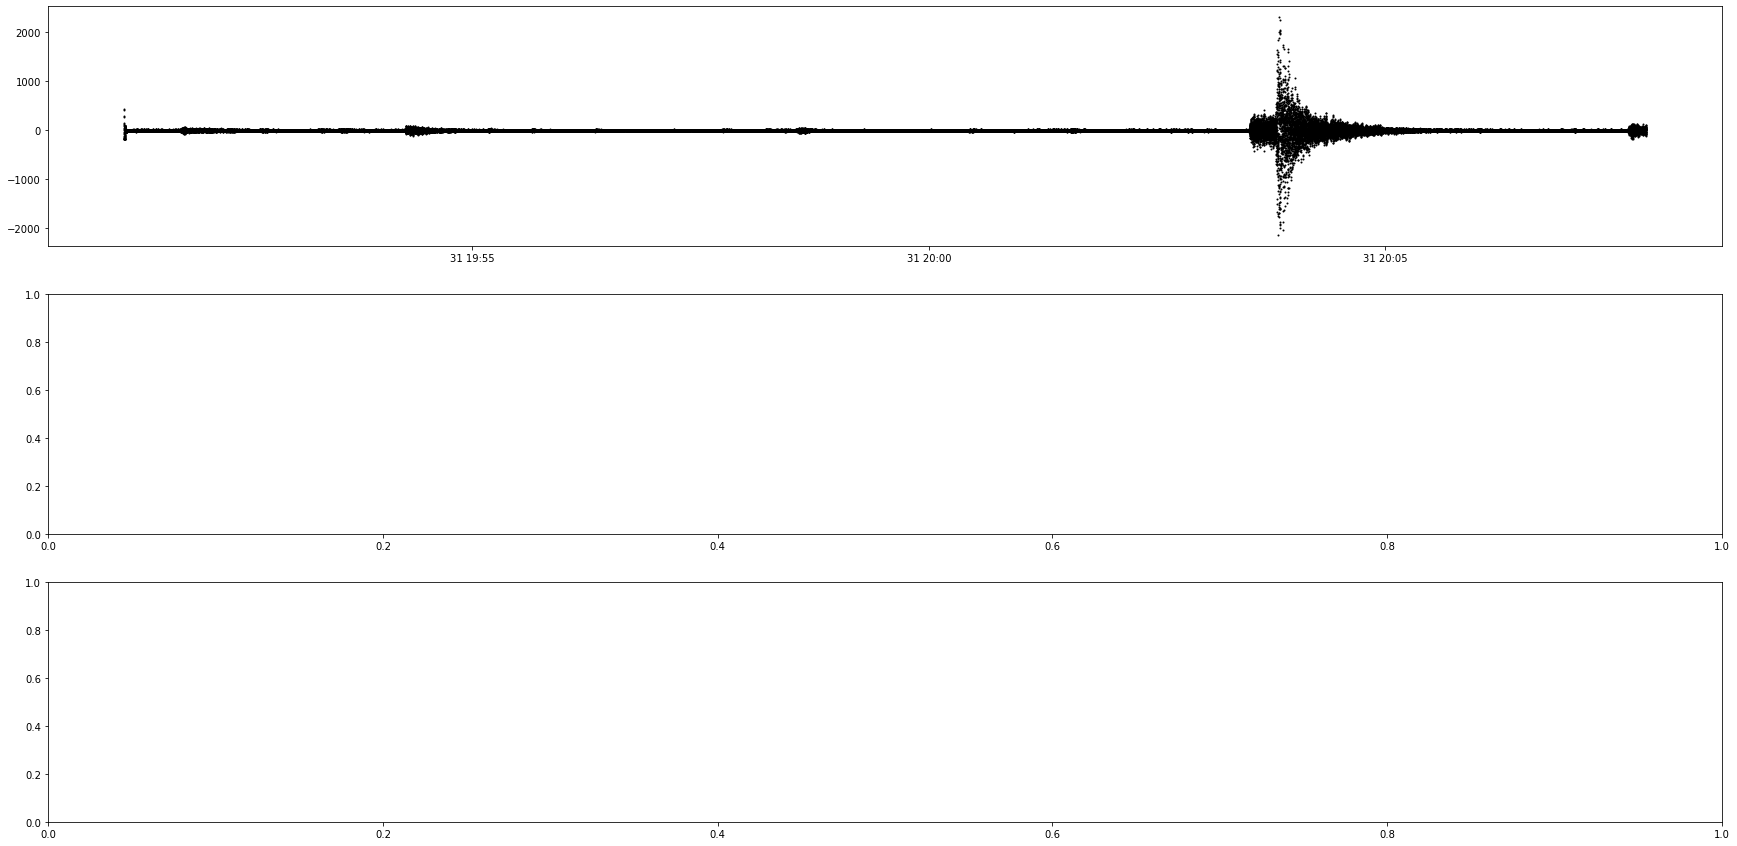

In [1654]:
# plot
fig, ax = plt.subplots(3,1,figsize=(30,15))
times = stream[0].times('matplotlib') + stream[0].stats.starttime.matplotlib_date
ax[0].plot_date(times, stream[0].data, markersize=1, label = 'E Stream', color = 'k')
p_waves = [obspy.UTCDateTime(t).matplotlib_date for t in new_df_p_waves['timestamp']]
#ax[0].vlines(p_waves[2], ymin=0, ymax=abs(stream.max()[0])*new_df_p_waves['prob'].iloc[2])

In [1655]:
stream[0].stats

         network: CX
         station: PB01
        location: 
         channel: HHE
       starttime: 2020-12-31T09:55:35.598393Z
         endtime: 2020-12-31T10:12:15.598393Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 100001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 13428, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 20700160})
      processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2020, 12, 31, 10, 12, 15, 598393)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2020, 12, 31, 9, 55, 35, 598393))', "ObsPy 1.2.2: filter(options={'freqmin': 1, 'freqmax': 20}::type='bandpass')"]